In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data 
df = pd.read_csv("/home/inventor/Datasets/Medical Cost/Medical _Cost/insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

In [14]:
df.drop_duplicates(inplace=True)

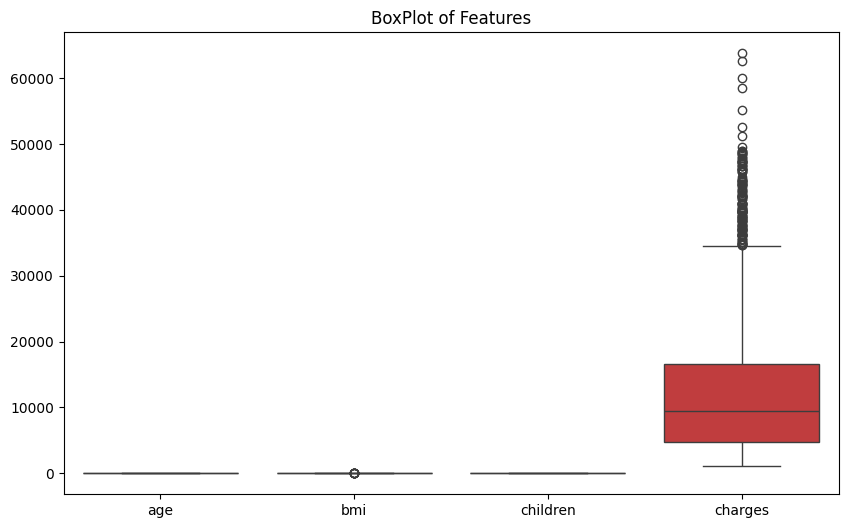

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title("BoxPlot of Features")
plt.show()

In [35]:
num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"]]
cat_cols = [col for col in df.columns if df[col].dtype not in ["float64", "int64"]]

In [36]:
# Identify the outliers

for i in range(df.shape[1]):
    column_data = df.iloc[: ,i]

    if column_data.dtype in ["float64", "int64"]:
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)

        IQR = q3 - q1

        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

        perc = len(outliers) / len(df) * 100

        print(f"Column {i} outlier = {perc: .2f}%")


Column 0 outlier =  0.00%
Column 2 outlier =  0.67%
Column 3 outlier =  0.00%
Column 6 outlier =  10.40%


In [42]:
corr_matrix = df[num_cols].corr()
print(corr_matrix["charges"].sort_values(ascending=False))

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64


In [43]:
cat_cols

['sex', 'smoker', 'region']

In [44]:
# Normalize the Data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [46]:
# One hot encoder 
from sklearn.preprocessing import OneHotEncoder

In [55]:
one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first")
encoder = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoder, columns=one_hot.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.297857,0.0,1.0,0.0,0.0,1.0
1,-1.511647,male,0.509422,-0.079442,no,southeast,-0.954381,1.0,0.0,0.0,1.0,0.0
2,-0.799350,male,0.383155,1.580143,no,southeast,-0.729373,1.0,0.0,0.0,1.0,0.0
3,-0.443201,male,-1.305052,-0.909234,no,northwest,0.719104,1.0,0.0,1.0,0.0,0.0
4,-0.514431,male,-0.292456,-0.909234,no,northwest,-0.777499,1.0,0.0,1.0,0.0,0.0


In [81]:
encoded_df.drop(columns=["sex", "smoker", "region"], axis=1,inplace=True)

SyntaxError: incomplete input (2561454771.py, line 1)

In [82]:
encoded_df.shape

(1338, 9)

In [95]:
encoded_df.isnull().sum()

encoded_df.dropna(inplace=True)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("charges", axis=1), encoded_df["charges"], test_size=0.2, random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred_sk = lr.predict(X_test)

In [102]:
from sklearn.metrics import r2_score

r2_score_sk = r2_score(y_test, y_pred_sk)

r2_score_sk

0.23980638761699702

In [103]:
class Multiple_Linear_Regression():

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0,1, axis=1)

        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

        print(f"Intercept_: {self.intercept_}, Coef_: {self.coef_}")
    
    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

In [104]:
mlr = Multiple_Linear_Regression()

In [105]:
mlr.fit(X_train, y_train)

Intercept_: -0.18091257280355522, Coef_: [ 0.2882226   0.14492261  0.05853551  0.08839744  0.76456333 -0.0156129
 -0.11723748 -0.06152964]


In [106]:
y_pred = mlr.predict(X_test)

In [108]:
def r2_score_custom(y_true, y_pred):

    mean_value = np.mean(y_true)

    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)

    r2_score = 1 - (SSE / TSS)
    return r2_score

In [109]:
r2_score_c = r2_score_custom(y_test, y_pred)

r2_score_c

np.float64(0.23980638761699724)